In [1]:
import os

In [2]:
from datetime import datetime
import matplotlib.pyplot as plt
import pandas as pd 
import math
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")


In [3]:
print("data.shape:", data.shape)
print("data.index:", data.index)
print("data.columns:", data.columns)
print("data_test.columns:", data_test.columns)

data.shape: (3000, 23)
data.index: RangeIndex(start=0, stop=3000, step=1)
data.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')
data_test.columns: Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew'],
      dtype='object')


### Pulizia dei dati

In [4]:
data.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [5]:
data.drop(['homepage'],axis=1,inplace=True)

In [6]:
def convertAll(data):

    data["release_date"] = pd.to_datetime(data["release_date"])
    #fix della data in quanto ci sono date che superano il 2021
    i=0
    maxDate = datetime.datetime(2020, 1, 1)
    n_elem = data.shape[0]
    while i<n_elem:
        if data['release_date'][i]>maxDate:
            new_year=(data['release_date'][i].year)-100
            new_date = datetime.datetime(new_year, data['release_date'][i].month, data['release_date'][i].day, 0, 0, 0)
            data['release_date'][i] = new_date
        i+=1
    i=0
    n_elem = data.shape[0]
    while i<n_elem:
        if isinstance(data["genres"][i], float):
            if math.isnan(data["genres"][i]):
                i+=1
                continue
        data["genres"][i]=eval(data["genres"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["production_countries"][i], float):
            if math.isnan(data["production_countries"][i]):
                i+=1
                continue
        data["production_countries"][i]=eval(data["production_countries"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["spoken_languages"][i], float):
            if math.isnan(data["spoken_languages"][i]):
                i+=1
                continue
        data["spoken_languages"][i]=eval(data["spoken_languages"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["Keywords"][i], float):
            if math.isnan(data["Keywords"][i]):
                i+=1
                continue
        data["Keywords"][i]=eval(data["Keywords"][i]) 
        i+=1
    
    i=0
    while i<n_elem:
        if isinstance(data["cast"][i], float):
            if math.isnan(data["cast"][i]):
                i+=1
                continue
        data["cast"][i]=eval(data["cast"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["crew"][i], float):
            if math.isnan(data["crew"][i]):
                i+=1
                continue
        data["crew"][i]=eval(data["crew"][i]) 
        i+=1

    i=0
    while i<n_elem:
        if isinstance(data["production_companies"][i], float):
            if math.isnan(data["production_companies"][i]):
                i+=1
                continue
        data["production_companies"][i]=eval(data["production_companies"][i])
        i+=1


In [7]:
convertAll(data)
convertAll(data_test)


<ipython-input-6-b2a67e616a86>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['release_date'][i] = new_date
<ipython-input-6-b2a67e616a86>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["genres"][i]=eval(data["genres"][i])
<ipython-input-6-b2a67e616a86>:32: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["production_countries"][i]=eval(data["production_countries"][i])
<ipython-input-6-b2a67e616a86>:41: SettingWithCop

In [8]:
#aggiunta la colonna anno di uscita
#per evitare errori usare il .dt per estrarre info dalle date
data["release_date"] = pd.to_datetime(data["release_date"])
data["release_year"]=data["release_date"].dt.year
data_test["release_year"]=data_test["release_date"].dt.year



In [9]:
#solamente a un film mancava la data, dopo averlo cercato abbiamo riempito il campo release_date con il dato corretto
i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if pd.isnull(data_test["release_date"][i]):
        print(data_test["id"][i])
        print(i)
        print(data_test["title"][i])
        print(data_test["release_date"][i])
    i+=1


new_date = datetime(2001, 3, 20, 0, 0, 0)
data_test["release_date"][828]=new_date

3829
828
Jails, Hospitals & Hip-Hop
NaT


<ipython-input-9-bfe46192726f>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test["release_date"][828]=new_date


In [10]:
#Riempiamo tutti i titoli mancanti con stringhe vuote
data_test.title=data_test.title.fillna("")
data.title=data.title.fillna("")

In [11]:
# sostituzione dei valori NaN nella colonna runtime con la media

i=0
n_elem = data.shape[0]
media = data["runtime"].describe()['mean']
while i<n_elem:
    if math.isnan(data["runtime"][i]):
        data["runtime"][i] = media
        print(data["id"][i])
    i+=1


1336
2303


<ipython-input-11-94295cf414cc>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["runtime"][i] = media


In [12]:
#out: lista di tutti i generi presenti nel DB
out = []
for lista_generi_per_film in data['genres']:
    if not isinstance(lista_generi_per_film, float):
        for genere in lista_generi_per_film:
            if genere['name'] not in out:
                out.append(genere['name'])
            
print(out)

['Comedy', 'Drama', 'Family', 'Romance', 'Thriller', 'Action', 'Animation', 'Adventure', 'Horror', 'Documentary', 'Music', 'Crime', 'Science Fiction', 'Mystery', 'Foreign', 'Fantasy', 'War', 'Western', 'History', 'TV Movie']


# Data overview

#### Film con incasso più alto

In [13]:
max_index = data['revenue'].idxmax() 
print('Il film con l\'incasso più alto è: ' + data['title'][max_index] + ' uscito il ' + str(data['release_date'][max_index].day) + '/' + str(data['release_date'][max_index].month) + '/' + str(data['release_date'][max_index].year)+'.')
print('L\'incasso è stato di '+str(data['revenue'][max_index])+' dollari.')

Il film con l'incasso più alto è: The Avengers uscito il 25/4/2012.
L'incasso è stato di 1519557910 dollari.


#### Film con la durata maggiore

In [43]:
max_index = data['runtime'].idxmax() 
print('Il film dalla durata maggiore è: ' + data['title'][max_index] + ', uscito il ' + str(data['release_date'][max_index].day) + '/' + str(data['release_date'][max_index].month) + '/' + str(data['release_date'][max_index].year)+'.')
data['runtime'][max_index]
print('Il film esiste sia come miniserie in tre parti che come lungometraggio di varie lunghezze comprese tra 319 e 338 minuti, nonché in diverse versioni abbreviate, che vanno da 187 minuti (versione cinematografica tedesca) a 166 minuti.')

Il film dalla durata maggiore è: Carlos, uscito il 19/5/2010.
Il film esiste sia come miniserie in tre parti che come lungometraggio di varie lunghezze comprese tra 319 e 338 minuti, nonché in diverse versioni abbreviate, che vanno da 187 minuti (versione cinematografica tedesca) a 166 minuti.


#### Film con durata minore

In [15]:
# rimuovo i film con durata 0 minuti
dataCopy = data[data['runtime'] != 0]

mix_index = dataCopy['runtime'].idxmin() 
print('Il film dalla durata minore è: "' + dataCopy['title'][mix_index] + '" dalla durata di '+str(dataCopy['runtime'][mix_index])+' minuti, è uscito il ' + str(dataCopy['release_date'][mix_index].day) + '/' + str(dataCopy['release_date'][mix_index].month) + '/' + str(dataCopy['release_date'][mix_index].year)+'.')
print('Considerato un punto di riferimento americano avanguardia cinema, racconta la storia di un uomo (Jules Raucourt) che si avvicina Hollywood con i sogni di diventare una star; fallisce e diventa disumanizzato, con i dirigenti dello studio che lo riducono al ruolo di un extra e scrivendo il numero "9413" sulla fronte.')

Il film dalla durata minore è: "The Life and Death of 9413, a Hollywood Extra" dalla durata di 11.0 minuti, è uscito il 16/6/1928.
Considerato un punto di riferimento americano avanguardia cinema, racconta la storia di un uomo (Jules Raucourt) che si avvicina Hollywood con i sogni di diventare una star; fallisce e diventa disumanizzato, con i dirigenti dello studio che lo riducono al ruolo di un extra e scrivendo il numero "9413" sulla fronte.


#### Film con il titolo più lungo

In [16]:
i=0
n_elem = data.shape[0]
max_len=len(data['title'][0])
curr_len=len(data['title'][0])
pos_maxlen=0
while i<n_elem:
    if isinstance(data['title'][i], str):
            curr_len=len(data['title'][i])
            if(curr_len>max_len):
                pos_maxlen=i
                max_len=curr_len
            i+=1
            continue
    i+=1 

print('Il film con il titolo più lungo è: "'+data['title'][pos_maxlen]+'" della lunghezza di '+str(max_len)+ ' caratteri.')

Il film con il titolo più lungo è: "The Chronicles of Narnia: The Lion, the Witch and the Wardrobe" della lunghezza di 62 caratteri.


#### Film con il titolo più breve

In [44]:
i=0
n_elem = data.shape[0]
min_len=len(data['title'][0])
curr_len=len(data['title'][0])
pos_minlen=0
while i<n_elem:
    if isinstance(data['title'][i], str):
            curr_len=len(data['title'][i])
            if(curr_len<min_len and curr_len > 0):
                pos_minlen=i
                min_len=curr_len
            i+=1
            continue
    i+=1 

print('Il film con il titolo più corto è: "'+data['title'][pos_minlen]+'" della lunghezza di '+str(min_len)+ ' caratteri, uscito il ' + str(dataCopy['release_date'][pos_minlen].day) + '/' + str(dataCopy['release_date'][pos_minlen].month) + '/' + str(dataCopy['release_date'][pos_minlen].year)+'.')
print('Si tratta di un riadattamento moderno dell\'Otello di William Shakespeare.')

Il film con il titolo più corto è: "O" della lunghezza di 1 caratteri, uscito il 31/8/2001.
Si tratta di un riadattamento moderno dell'Otello di William Shakespeare.


#### Film meno recente

In [18]:
mix_index = data['release_date'].idxmin() 

print('Il film più vecchio è: "' + data['title'][mix_index] + '" uscito il ' + str(data['release_date'][mix_index].day) + '/' + str(data['release_date'][mix_index].month) + '/' + str(data['release_date'][mix_index].year)+'.')


Il film più vecchio è: "The Kid" uscito il 21/1/1921.


#### Film più recente

In [19]:
mix_index = data['release_date'].idxmax() 

print('Il film più recente è: "' + data['title'][mix_index] + '" uscito il ' + str(data['release_date'][mix_index].day) + '/' + str(data['release_date'][mix_index].month) + '/' + str(data['release_date'][mix_index].year)+'.')

Il film più recente è: "Valerian and the City of a Thousand Planets" uscito il 20/7/2017.


#### Film più popolare

In [20]:
mix_index = data['popularity'].idxmax() 
print('Il film più popolare è: "' + data['title'][mix_index] + '" uscito il ' + str(data['release_date'][mix_index].day) + '/' + str(data['release_date'][mix_index].month) + '/' + str(data['release_date'][mix_index].year)+'.')
print('La sua popularity è '+str(data['popularity'][mix_index])+'.')

Il film più popolare è: "Wonder Woman" uscito il 30/5/2017.
La sua popularity è 294.337037.


# Jaccard

In [21]:
def get_words (data):
    descrizioni = []
    i=0
    while i<1000:
        if isinstance(data["overview"][i], float):
            if math.isnan(data["overview"][i]):
                empty_list=[]
                descrizioni += empty_list
                i+=1
                continue
        desc = data["overview"][i]         # this is a string
        words = desc.split() # this is a list
        words = set(words)     # create a set
        descrizioni += [words] # append words to the list
        i=i+1
    return descrizioni

In [45]:
overview_word_split = get_words(data)

print ( overview_word_split[1] )

{'life', 'riding', 'her', 'once', 'duties', 'continues', 'turned', 'now', 'horses', 'graduate', 'again', 'way', 'the', "lessons'-", 'Mia', 'Genovia', 'a', 'friend', 'complicated', 'to', 'college', 'Her', 'princess.', 'not', 'crown', "'princess", 'for', 'best', 'side-saddle,', 'is', 'and', 'only', 'archery,', 'other', 'learns', 'joins', 'queen', 'than', 'also', 'that', 'up', 'Lilly', 'royal.', 'on', 'But', 'upside', 'she', 'Thermopolis', 'earlier', 'summer.', 'down', 'when', 'take', 'as', 'expected...'}


In [23]:
def jaccard(a,b):
    return len(a & b) / len( a | b)

In [24]:
def most_similar_jaccard(film_ricerca, overview_word_split):
    most_similar_id=2
    jaccard_most_similar=jaccard(overview_word_split[film_ricerca],overview_word_split[3])
    list_size=len(overview_word_split)
    current_id=3
    while current_id<list_size:
        current_sim=jaccard(overview_word_split[film_ricerca],overview_word_split[current_id])
        if current_sim>jaccard_most_similar:
            jaccard_most_similar=current_sim
            most_similar_id=current_id
        current_id=current_id+1
    
    return most_similar_id, jaccard_most_similar

 ### Ricerca del film più simile 'The Princess Diaries 2: Royal Engagement'

In [47]:
sim_id, sim_value = most_similar_jaccard(1, overview_word_split)

jaccard(overview_word_split[1],overview_word_split[sim_id])

0.14583333333333334

In [48]:
data['title'][sim_id]

'The Alamo'

# Revenue basata sul budget per film

data_with_budget.shape: (2188, 23)


Text(0.5, 1.0, 'Revenue based on budget per movie')

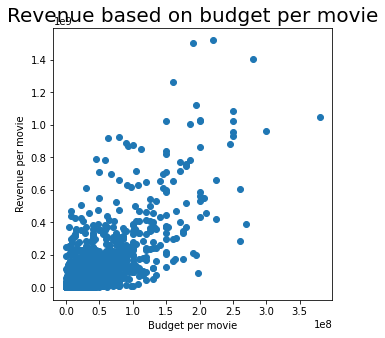

In [27]:
#data_with_budget: array tolti gli elementi con budget = 0
data_with_budget = data[data["budget"] != 0]

fig, ax = plt.subplots(figsize=(5,5))

ax.scatter(data_with_budget.iloc[:, 2], data_with_budget.iloc[:, 21])

ax.set_xlabel("Budget per movie", fontsize=10)
ax.set_ylabel("Revenue per movie", fontsize=10)
ax.set_title('Revenue based on budget per movie', fontsize=20)

# Duration of the films over the years

(1960.0, 2021.8)

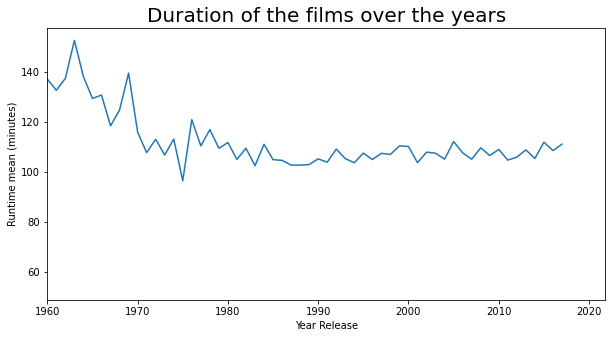

In [50]:
grupByMovies=data['runtime'].groupby(data["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Runtime mean (minutes)", fontsize=10)
x.set_title('Duration of the films over the years', fontsize=20)

# Abbiamo fatto partire il grafico dal 1960, in quanto non c'erano dati sufficienti per gli anni precedenti
x.set_xlim(1960)

# Male-Female ratio in Disney movies

In [29]:
#trovo tutte le compagnie di produzione dei film e le metto nella lista pc
pc = []
for lista_compagnie in data_test['production_companies']:
    if not isinstance(lista_compagnie, float):
        for compagnia in lista_compagnie:
            if compagnia['name'] not in pc:
                pc.append(compagnia['name'])
            
print(pc)

['Woolner Brothers Pictures Inc.', 'Warner Bros.', 'Outlaw Productions (I)', 'Miramax', 'TS Productions', 'Micro scope', 'Phi Group', 'Castle Rock Entertainment', 'Detour Filmproduction', 'X-Filme Creative Pool', 'ARTE', 'Westdeutscher Rundfunk (WDR)', 'ARD Degeto Film', 'Walt Disney Pictures', 'Ecosse Films', '2 Entertain', 'Bueprint Pictures', 'Pixar Animation Studios', 'Primetime Pictures', 'Emergence Entertainment', 'Canal+', 'Arte France', 'Arte France Cinéma', 'Hold Up Films', 'Ciné+', "Agence Nationale pour la Cohésion Sociale et l'Egalité des Chances (ACSE)", 'Région Ile-de-France', 'Fonds Images de la Diversité', 'Pyramide Distribution', 'Centre National de la Cinématographie (CNC)', 'Films Distribution', 'Lilies Films', 'Arte / Cofinova 9', 'CAT Films', 'Mimosa Films', 'The Weinstein Company', 'Summit Entertainment', 'Endgame Entertainment', 'First Point Entertainment', 'Braeburn Entertainment', 'United Artists', 'Metro-Goldwyn-Mayer (MGM)', 'New Crime Productions', 'Alcon En

In [30]:
#stampo tutti i film che sono stati prodotti dalla Disney e li aggiungo ad una lista
#cerco nelle case di produzione tutte quelle che contengano Disney nel nome
#Walt Disney Pictures
list_Disney=[]

i=0
n_elem = data_test.shape[0]
while i<n_elem:
    if not isinstance(data_test["production_companies"][i], float):
        for compagnia in data_test["production_companies"][i]:
            if not isinstance(compagnia, float):
                if compagnia['name'].find('Disney')!=-1:
                    list_Disney.append(i)
    i+=1
 
print(list_Disney)

[7, 60, 78, 158, 198, 249, 273, 273, 282, 371, 393, 397, 407, 422, 439, 439, 444, 458, 487, 534, 560, 576, 646, 651, 659, 659, 707, 707, 724, 788, 791, 870, 876, 899, 933, 942, 966, 966, 972, 1011, 1060, 1152, 1175, 1179, 1207, 1231, 1255, 1255, 1264, 1266, 1269, 1269, 1270, 1285, 1296, 1299, 1372, 1376, 1388, 1388, 1395, 1550, 1565, 1579, 1589, 1603, 1634, 1705, 1739, 1739, 1826, 1834, 1861, 1861, 1913, 2083, 2150, 2191, 2192, 2235, 2240, 2277, 2279, 2292, 2294, 2294, 2350, 2365, 2432, 2445, 2469, 2469, 2495, 2509, 2603, 2607, 2611, 2616, 2616, 2627, 2659, 2680, 2749, 2824, 2924, 2939, 2939, 2977, 2977, 3034, 3066, 3102, 3212, 3212, 3345, 3345, 3413, 3442, 3445, 3487, 3533, 3613, 3662, 3668, 3691, 3692, 3698, 3700, 3760, 3795, 3914, 3959, 3966, 4053, 4058, 4058, 4123, 4123, 4188, 4211, 4215, 4290, 4366]


In [31]:
#Per ogni membro del cast è indicato il sesso: 1 se donna, 2 se uomo
data_test['MFRatio']=float('NaN')

maxMF = 0
index=0

for i in list_Disney:
    n_male=1
    n_female=1
    if not isinstance(data_test["cast"][i], float):
        for person in data_test['cast'][i]:
            if person['gender']==1:
                n_female+=1
            elif person['gender']==2:
                n_male+=1    
    data_test['MFRatio'][i]=n_male/n_female
    if data_test['MFRatio'][i] > maxMF:
        maxMF = data_test['MFRatio'][i]
        index=i


<ipython-input-31-bd3d3e3c536c>:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['MFRatio'][i]=n_male/n_female


In [32]:
#creo il dataframe con solo i film della Disney
film_Disney=data_test

film_Disney.sort_values(by=['release_date'], ascending = True, inplace = True)

film_Disney=film_Disney.dropna(subset=['MFRatio'])


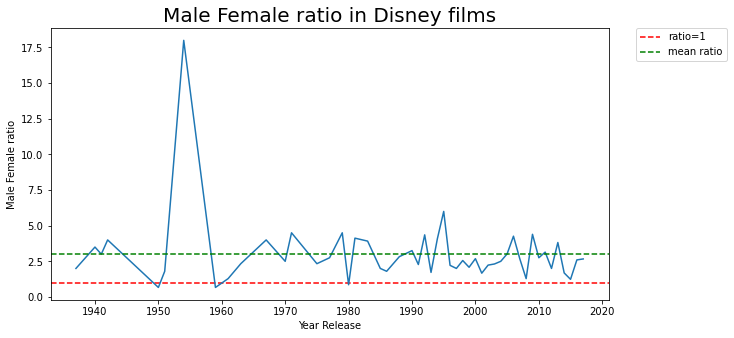

In [33]:
grupByMovies=film_Disney['MFRatio'].groupby(film_Disney["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.axhline(y=1, xmin=0, xmax=1,label="ratio=1", linestyle='--',color="red")
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Male Female ratio", fontsize=10)
x.set_title('Male Female ratio in Disney films', fontsize=20)
x.axhline(y=grupByMovies['mean'].mean(), xmin=0, xmax=1,label="mean ratio", linestyle='--',color="green")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

Il picco massimo che si nota nel grafico è stato raggiunto dal film "20,000 Leagues Under the Sea", uscito nel 1954, il cui cast era composta da soli attori uomini.

# Analisi industria del film tedesca

In [51]:
# Creiamo la lista di indici di film le cui compagnie di produzioni sono tedesche
list_Germany=[]

i=0
n_elem = data.shape[0]
while i<n_elem:
    if not isinstance(data["production_countries"][i], float):
        for peasi in data["production_countries"][i]:
            if not isinstance(peasi, float):
                if peasi['name']=='Germany':
                    list_Germany.append(i)
    i+=1

print(list_Germany)

[18, 31, 56, 60, 70, 71, 80, 82, 125, 132, 143, 175, 180, 200, 230, 247, 251, 261, 268, 294, 296, 354, 356, 380, 385, 415, 448, 449, 471, 527, 528, 558, 587, 619, 633, 635, 658, 659, 660, 661, 688, 691, 710, 726, 738, 750, 751, 762, 765, 779, 787, 815, 850, 869, 871, 960, 1004, 1031, 1125, 1127, 1131, 1132, 1149, 1160, 1185, 1194, 1211, 1234, 1248, 1255, 1256, 1276, 1308, 1313, 1331, 1349, 1379, 1422, 1426, 1451, 1466, 1484, 1493, 1498, 1606, 1613, 1625, 1635, 1754, 1765, 1775, 1782, 1787, 1792, 1799, 1809, 1811, 1815, 1829, 1840, 1875, 1928, 1929, 1970, 2002, 2025, 2035, 2042, 2045, 2048, 2053, 2062, 2073, 2096, 2159, 2205, 2237, 2248, 2271, 2302, 2314, 2324, 2332, 2338, 2365, 2440, 2448, 2460, 2465, 2486, 2490, 2495, 2508, 2515, 2517, 2530, 2537, 2583, 2608, 2612, 2626, 2631, 2649, 2691, 2709, 2745, 2763, 2779, 2796, 2800, 2802, 2810, 2812, 2840, 2842, 2844, 2864, 2881, 2885, 2895, 2913, 2920, 2922, 2929, 2941, 2969, 2974]


In [35]:
# Andiamo a creare la creare la colonna che indica se il film è di provenienza tedesca o meno
index=0
data['Is_De']=float('NaN')

for i in list_Germany:
    data['Is_De'][i]=1

data['Is_De']

<ipython-input-35-190cfa2a1fa1>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Is_De'][i]=1


0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
        ..
2995   NaN
2996   NaN
2997   NaN
2998   NaN
2999   NaN
Name: Is_De, Length: 3000, dtype: float64

In [36]:
#creo il dataframe con solo i film prodotti in Germania
film_De=data

film_De.sort_values(by=['release_date'], ascending = True, inplace = True)

film_De=film_De.dropna(subset=['Is_De'])


Text(0.5, 1.0, 'German movies industry')

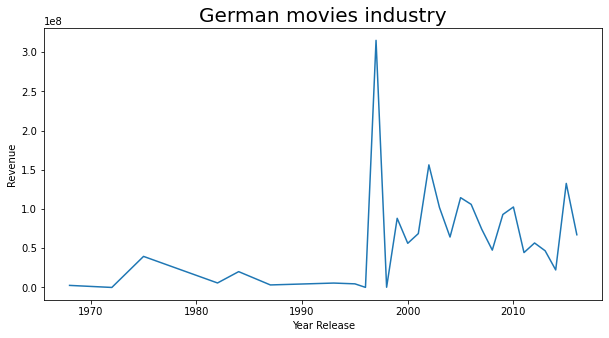

In [37]:
grupByMovies=film_De['revenue'].groupby(film_De["release_year"]).describe()
fig, x=plt.subplots(figsize=(10,5))
x.plot(grupByMovies['mean'])
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Revenue", fontsize=10)
x.set_title('German movies industry', fontsize=20)

Prima di analizzare il grafico è importante spiegare il contesto storico vissuto dalla Germania durante il secolo.
Nel dopoguerra la Germania viene divisa tra Germania Est e Germania Ovest. 
La Germania Est, sotto il controllo dell'URSS, subisce una forte censura anche per quanto riguarda il mercato cinematografico, di conseguenza il numero di film rilasciati è limitato e non incontra totalmente il gusto del pubblico.
Nella Germania Ovest la situazione è differente essendo occupata dagli Alleati, dove il governo era democratico. Non erano infatti presenti azioni di censura per quanto riguarda i film. Ciò nonostante il popolo della germania occidentale rimane attratto dalle produzioni anglo-americane provocando l'affossamento dell'industria cinematografica.
Nel 1989 con la caduta del muro di Berlino e la riunificazione della Germania portano negli anni successivi a una rinascita dell'industria cinematografica tedesca. 

# Analisi film post primo allunaggio ('69)

In [38]:
# Creiamo il DataSet con cui andremo a lavorare in questa sezione, creando anche la colonna che indica se un film parla di spazio o meno
film_space = data

film_space["isLanded"] = False


In [39]:
i=0
n_elem = film_space.shape[0]
while i<n_elem:
    if not isinstance(film_space["Keywords"][i], float):
        for keyword in film_space["Keywords"][i]:
            if not isinstance(keyword, float):
                if keyword['name'].find('astro')!=-1 or keyword['name'].find('space')!=-1 or keyword['name'].find('moon')!=-1 or keyword['name'].find('alien')!=-1:
                    film_space["isLanded"][i] = True
    i+=1

film_space["isLanded"]


<ipython-input-39-fb02ea8391ae>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  film_space["isLanded"][i] = True


1763    False
2992    False
1917    False
1361    False
2680    False
        ...  
2838    False
1695    False
1354    False
1715    False
2623     True
Name: isLanded, Length: 3000, dtype: bool

Text(0.5, 1.0, 'Post moon landing film')

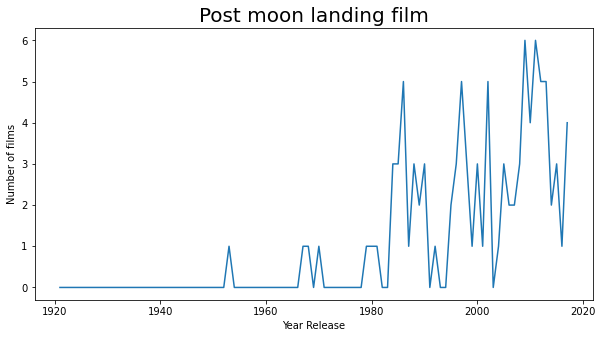

In [40]:
fig, x=plt.subplots(figsize=(10,5))
x.plot(film_space.groupby(["release_year"])['isLanded'].sum())
x.set_xlabel("Year Release", fontsize=10)
x.set_ylabel("Number of films", fontsize=10)
x.set_title('Post moon landing film', fontsize=20)